In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
from keras.models import Model
from random import randint

In [3]:
pkl_files = 'full_data.pickle'
with open(pkl_files, 'rb') as file:
    data = pickle.load(file)
    print(data['train_dataset'].shape)
    print(data['train_labels'].shape)
    print(data['valid_dataset'].shape)
    print(data['valid_labels'].shape)
    print(data['test_dataset'].shape)
    print(data['test_labels'].shape)

(45000, 28, 28)
(45000,)
(7000, 28, 28)
(7000,)
(1870, 28, 28)
(1870,)


In [4]:
train_x = data['train_dataset'].reshape(-1, 784)
val_x = data['valid_dataset'].reshape(-1, 784)
test_x = data['test_dataset'].reshape(-1, 784)

print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

(45000, 784)
(7000, 784)
(1870, 784)


In [5]:
## input layer
input_layer = Input(shape=(784,))

## encoding architecture
encode_layer1 = Dense(1500, activation='relu')(input_layer)
encode_layer2 = Dense(1000, activation='relu')(encode_layer1)
encode_layer3 = Dense(500, activation='relu')(encode_layer2)

## latent view
latent_view   = Dense(10, activation='sigmoid')(encode_layer3)

## decoding architecture
decode_layer1 = Dense(500, activation='relu')(latent_view)
decode_layer2 = Dense(1000, activation='relu')(decode_layer1)
decode_layer3 = Dense(1500, activation='relu')(decode_layer2)

## output layer
output_layer  = Dense(784)(decode_layer3)

model = Model(input_layer, output_layer)

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              1177500   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_5 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              501000    
__________

In [7]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x,
          train_x,
          epochs=20,
          batch_size=2048,
          validation_data=(val_x, val_x),
          callbacks=[early_stopping])

Train on 45000 samples, validate on 7000 samples
Epoch 1/20
45000/45000 [==============================] - 3s 75us/step - loss: 0.1709 - val_loss: 0.1346
Epoch 2/20
45000/45000 [==============================] - 1s 17us/step - loss: 0.1256 - val_loss: 0.1162
Epoch 3/20
45000/45000 [==============================] - 1s 16us/step - loss: 0.1043 - val_loss: 0.0946
Epoch 4/20
45000/45000 [==============================] - 1s 15us/step - loss: 0.0893 - val_loss: 0.0840
Epoch 5/20
45000/45000 [==============================] - 1s 15us/step - loss: 0.0796 - val_loss: 0.0789
Epoch 6/20
45000/45000 [==============================] - 1s 15us/step - loss: 0.0724 - val_loss: 0.0683
Epoch 7/20
45000/45000 [==============================] - 1s 17us/step - loss: 0.0661 - val_loss: 0.0640
Epoch 8/20
45000/45000 [==============================] - 1s 16us/step - loss: 0.0619 - val_loss: 0.0599
Epoch 9/20
45000/45000 [==============================] - 1s 18us/step - loss: 0.0581 - val_loss: 0.0571
Epoch 

In [8]:
preds = model.predict(test_x)

In [9]:
test_x_pics = test_x.reshape(-1, 28, 28)
preds_pics = preds.reshape(-1, 28, 28)

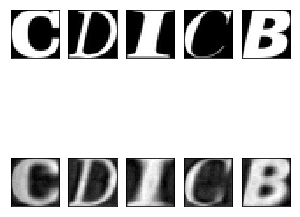

In [10]:
test_gt = []
test_pred = []
indices = np.random.choice(test_x_pics.shape[0], 5, replace=False)
for idx in indices:
    test_gt.append(test_x_pics[idx])
    test_pred.append(preds_pics[idx])

fig, ax = plt.subplots(2, 5, figsize=(5, 5))
for j in range(5):
    ax[0, j].get_xaxis().set_visible(False)
    ax[0, j].get_yaxis().set_visible(False)
    ax[0, j].cla()
    ax[0, j].imshow(test_gt[j], cmap='gray')
    
for j in range(5):
    ax[1, j].get_xaxis().set_visible(False)
    ax[1, j].get_yaxis().set_visible(False)
    ax[1, j].cla()
    ax[1, j].imshow(test_pred[j], cmap='gray')

plt.show()